In [50]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_csv("../../labelled_data/part_B/processed_partb.csv")

In [52]:
df = df.drop("Unnamed: 0",axis=1)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100726 entries, 0 to 1100725
Data columns (total 62 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Rndrng_Prvdr_Crdntls           1100726 non-null  int64  
 1   Rndrng_Prvdr_Gndr              1100726 non-null  float64
 2   Rndrng_Prvdr_Type              1100726 non-null  int64  
 3   Rndrng_Prvdr_Mdcr_Prtcptg_Ind  1100726 non-null  int64  
 4   Tot_HCPCS_Cds                  1100726 non-null  float64
 5   Tot_Benes                      1100726 non-null  float64
 6   Tot_Srvcs                      1100726 non-null  float64
 7   Tot_Sbmtd_Chrg                 1100726 non-null  float64
 8   Tot_Mdcr_Alowd_Amt             1100726 non-null  float64
 9   Tot_Mdcr_Pymt_Amt              1100726 non-null  float64
 10  Tot_Mdcr_Stdzd_Amt             1100726 non-null  float64
 11  Drug_Sprsn_Ind                 130700 non-null   float64
 12  Drug_Tot_HCPCS

In [54]:
from miceforest import ImputationKernel

mice_kernel = ImputationKernel(
data = df,
save_all_iterations = True,
random_state = 2023
)

In [55]:
mice_kernel.mice()
mice_imputation = mice_kernel.complete_data()
mice_imputation.head()

,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Alowd_Amt,Tot_Mdcr_Pymt_Amt,...,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre,Rndrng_NPI,Fraud,FraudType
0,7310,0.0,39,1,16.0,291.0,764.0,402812.00,85319.63,69175.78,...,75.0,66.0,11.0,51.0,9.0,19.0,2.5028,1003000126,0,0
1,7310,0.0,65,1,18.0,2633.0,5930.0,915291.00,227372.53,176497.74,...,48.0,24.0,10.0,38.0,1.0,3.0,1.1124,1003000134,0,0
2,7310,0.0,5,1,54.0,167.0,2003.0,182532.48,101757.15,76938.82,...,68.0,31.0,6.0,75.0,10.0,5.0,1.6935,1003000142,0,0
3,7310,1.0,56,1,21.0,56.0,571.0,23680.00,9011.99,7224.35,...,50.0,23.0,20.0,32.0,0.0,0.0,0.7089,1003000423,0,0
4,9043,0.0,27,1,30.0,89.0,125.0,152154.00,30631.10,23962.85,...,60.0,33.0,13.0,57.0,7.0,8.0,2.1137,1003000480,0,0


In [56]:
mice_imputation

,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Alowd_Amt,Tot_Mdcr_Pymt_Amt,...,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre,Rndrng_NPI,Fraud,FraudType
0,7310,0.0,39,1,16.0,291.0,764.0,402812.00,85319.63,69175.78,...,75.0,66.0,11.0,51.0,9.0,19.0,2.5028,1003000126,0,0
1,7310,0.0,65,1,18.0,2633.0,5930.0,915291.00,227372.53,176497.74,...,48.0,24.0,10.0,38.0,1.0,3.0,1.1124,1003000134,0,0
2,7310,0.0,5,1,54.0,167.0,2003.0,182532.48,101757.15,76938.82,...,68.0,31.0,6.0,75.0,10.0,5.0,1.6935,1003000142,0,0
3,7310,1.0,56,1,21.0,56.0,571.0,23680.00,9011.99,7224.35,...,50.0,23.0,20.0,32.0,0.0,0.0,0.7089,1003000423,0,0
4,9043,0.0,27,1,30.0,89.0,125.0,152154.00,30631.10,23962.85,...,60.0,33.0,13.0,57.0,7.0,8.0,2.1137,1003000480,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100721,7310,0.0,22,1,9.0,155.0,171.0,329504.00,32266.94,25803.90,...,75.0,70.0,9.0,48.0,27.0,15.0,3.4526,1992999437,0,0
1100722,7310,1.0,39,1,40.0,333.0,1093.0,182515.00,93505.14,68252.03,...,66.0,25.0,9.0,41.0,3.0,4.0,1.2418,1992999551,0,0
1100723,3073,0.0,13,1,2.0,66.0,415.0,20985.00,16171.02,11759.42,...,53.0,26.0,17.0,56.0,0.0,0.0,0.9525,1992999585,0,0
1100724,7310,0.0,63,1,46.0,456.0,851.0,304460.56,113283.09,85463.83,...,53.0,26.0,9.0,37.0,3.0,2.0,1.1737,1992999825,0,0


In [57]:
df.isna().sum()

Rndrng_Prvdr_Crdntls                  0
Rndrng_Prvdr_Gndr                     0
Rndrng_Prvdr_Type                     0
Rndrng_Prvdr_Mdcr_Prtcptg_Ind         0
Tot_HCPCS_Cds                         0
                                  ...  
Bene_CC_Strok_Pct                532751
Bene_Avg_Risk_Scre                    0
Rndrng_NPI                            0
Fraud                                 0
FraudType                             0
Length: 62, dtype: int64

In [58]:
mice_imputation.isna().sum()

Rndrng_Prvdr_Crdntls             0
Rndrng_Prvdr_Gndr                0
Rndrng_Prvdr_Type                0
Rndrng_Prvdr_Mdcr_Prtcptg_Ind    0
Tot_HCPCS_Cds                    0
                                ..
Bene_CC_Strok_Pct                0
Bene_Avg_Risk_Scre               0
Rndrng_NPI                       0
Fraud                            0
FraudType                        0
Length: 62, dtype: int64

In [59]:
df["Bene_CC_Strok_Pct"]

0          19.0
1           3.0
2           NaN
3           NaN
4           NaN
           ... 
1100721    15.0
1100722     4.0
1100723     NaN
1100724     2.0
1100725    23.0
Name: Bene_CC_Strok_Pct, Length: 1100726, dtype: float64

In [60]:
mice_imputation["Bene_CC_Strok_Pct"]

0          19.0
1           3.0
2           5.0
3           0.0
4           8.0
           ... 
1100721    15.0
1100722     4.0
1100723     0.0
1100724     2.0
1100725    23.0
Name: Bene_CC_Strok_Pct, Length: 1100726, dtype: float64

In [61]:
mice_imputation.to_csv("../../labelled_data/part_B/imputed_partB.csv")

In [22]:
mean_value = df['Bene_CC_Strok_Pct'].mean()
mean_df = df.copy()
mean_df['Bene_CC_Strok_Pct'].fillna(mean_value, inplace=True)

In [23]:
mean_value = df['Bene_CC_Strok_Pct'].median()
median_df = df.copy()
median_df['Bene_CC_Strok_Pct'].fillna(mean_value, inplace=True)

In [24]:
mean_value = df['Bene_CC_Strok_Pct'].mode().values[0]
mode_df = df.copy()
mode_df['Bene_CC_Strok_Pct'].fillna(mean_value, inplace=True)

<Figure size 1200x800 with 0 Axes>

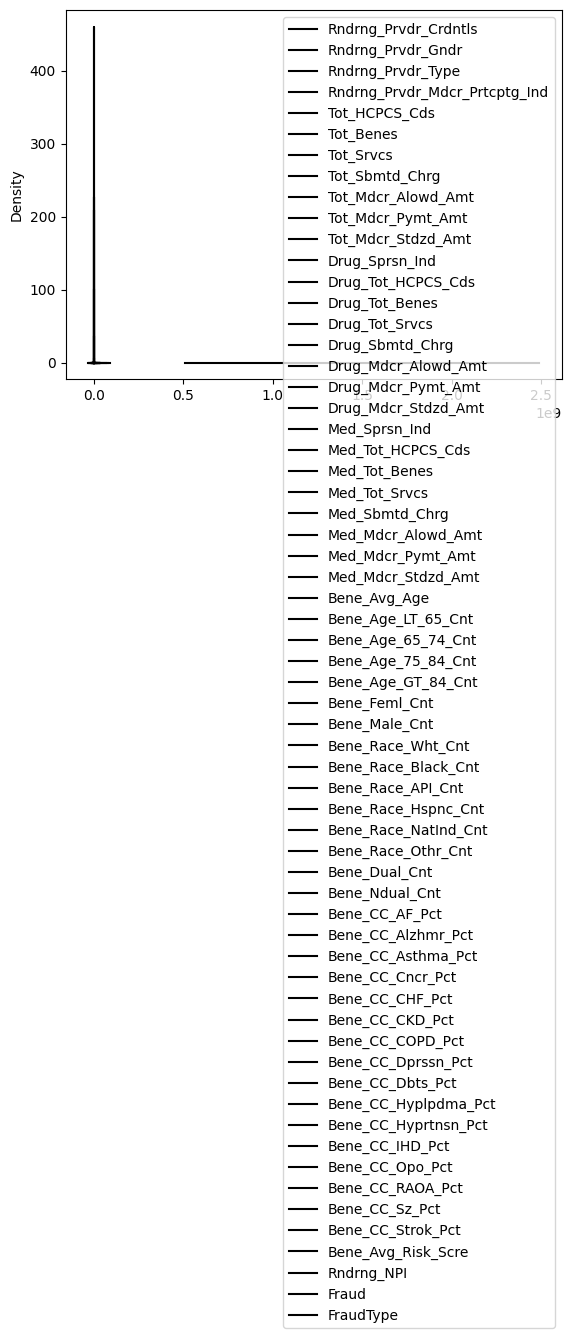

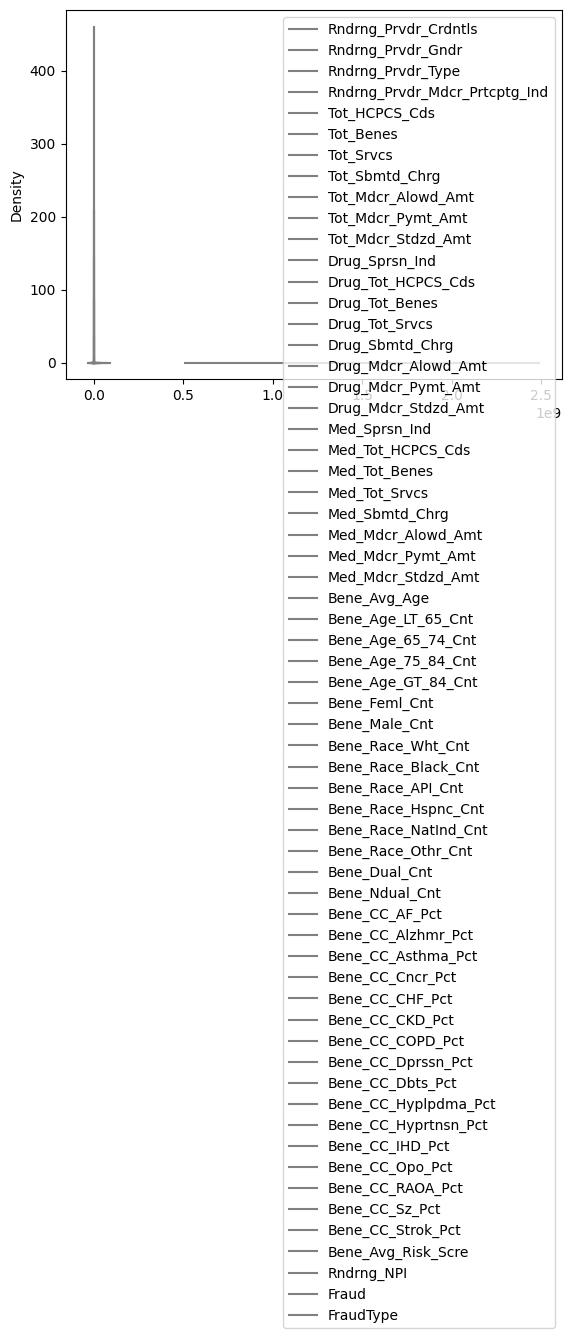

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

df.plot(kind='kde',color="black")
mice_imputation.plot(kind='kde',color="gray")
plt.show()

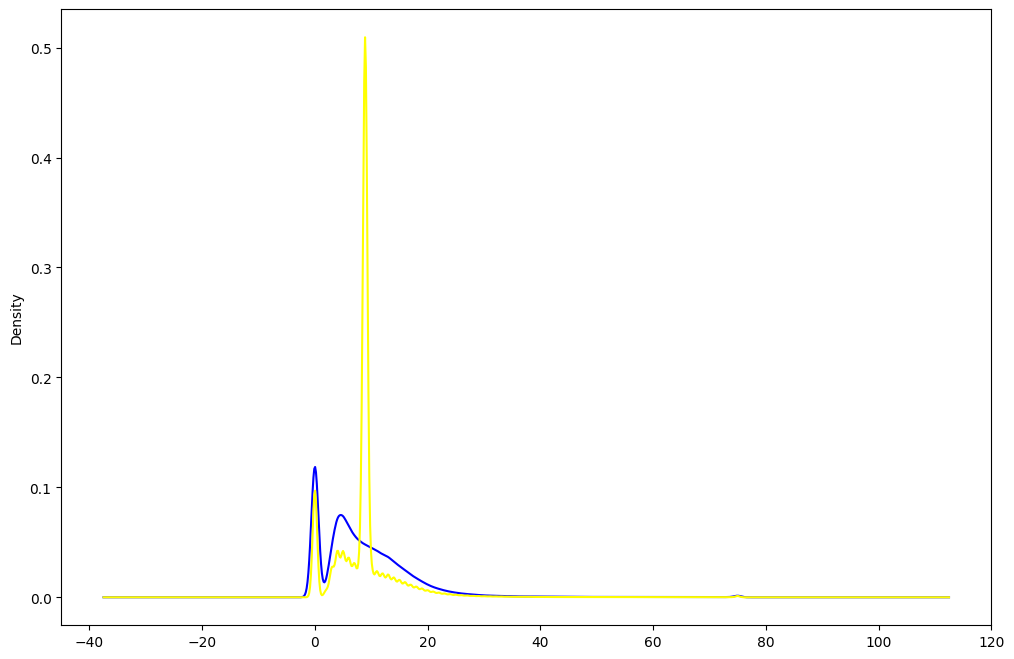

In [32]:
plt.figure(figsize=(12,8))

df["Bene_CC_Strok_Pct"].plot(kind='kde',color='blue')
mean_df["Bene_CC_Strok_Pct"].plot(kind='kde',color='yellow')
plt.show()

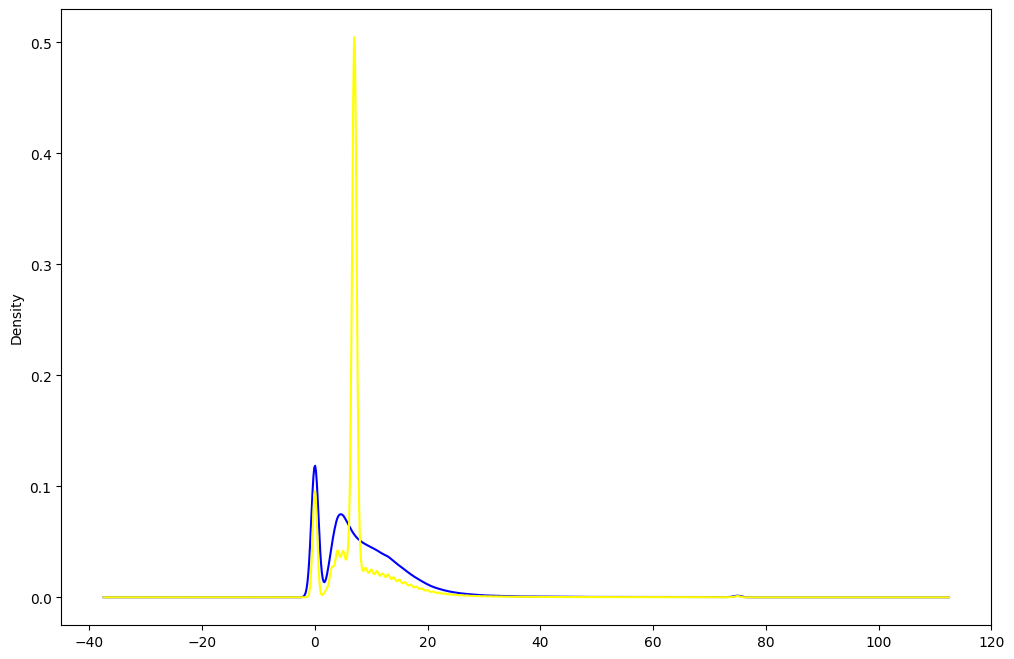

In [33]:
plt.figure(figsize=(12,8))

df["Bene_CC_Strok_Pct"].plot(kind='kde',color='blue')
median_df["Bene_CC_Strok_Pct"].plot(kind='kde',color='yellow')
plt.show()

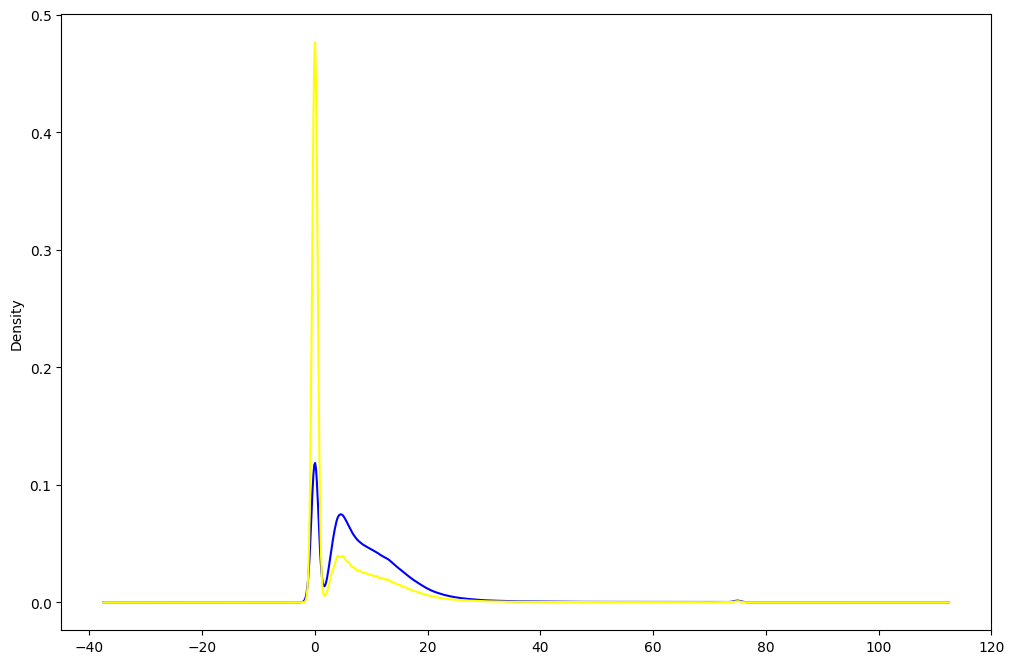

In [35]:
plt.figure(figsize=(12,8))

df["Bene_CC_Strok_Pct"].plot(kind='kde',color='blue')
mode_df["Bene_CC_Strok_Pct"].plot(kind='kde',color='yellow')
plt.show()

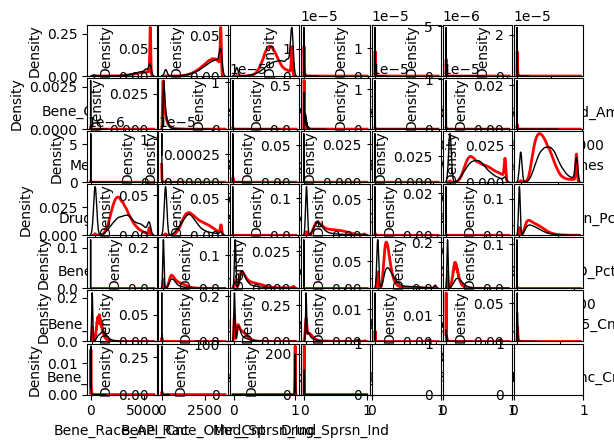

In [42]:
mice_kernel.plot_imputed_distributions(wspace=0.02,hspace=0.04)

In [43]:
help(mice_kernel.plot_imputed_distributions)

Help on method plot_imputed_distributions in module miceforest.ImputedData:

plot_imputed_distributions(datasets=None, variables=None, iteration=None, **adj_args) method of miceforest.ImputationKernel.ImputationKernel instance
    Plot the imputed value distributions.
    Red lines are the distribution of original data
    Black lines are the distribution of the imputed values.
    
    Parameters
    ----------
    datasets: None, int, list[int]
    variables: None, str, int, list[str], or list[int]
        The variables to plot. If None, all numeric variables
        are plotted.
    iteration: None, int
        The iteration to plot the distribution for.
        If None, the latest iteration is plotted.
        save_all_iterations must be True if specifying
        an iteration.
    adj_args
        Additional arguments passed to plt.subplots_adjust()

